## **LGM-VIP Data Science Internship Programme**

**Intermediate Level Task-2 : Prediction using Decision Tree  Algorithm**

**Author : S Sreevatsav**

**Language : Python**


# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import plotly.express as px

# **Loading Data**

In [2]:
dataset=pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset=dataset.sample(frac=1)
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
117,118,7.7,3.8,6.7,2.2,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
134,135,6.1,2.6,5.6,1.4,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 80 to 64
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [5]:
dataset['Species'].unique()

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

# **Visualization**

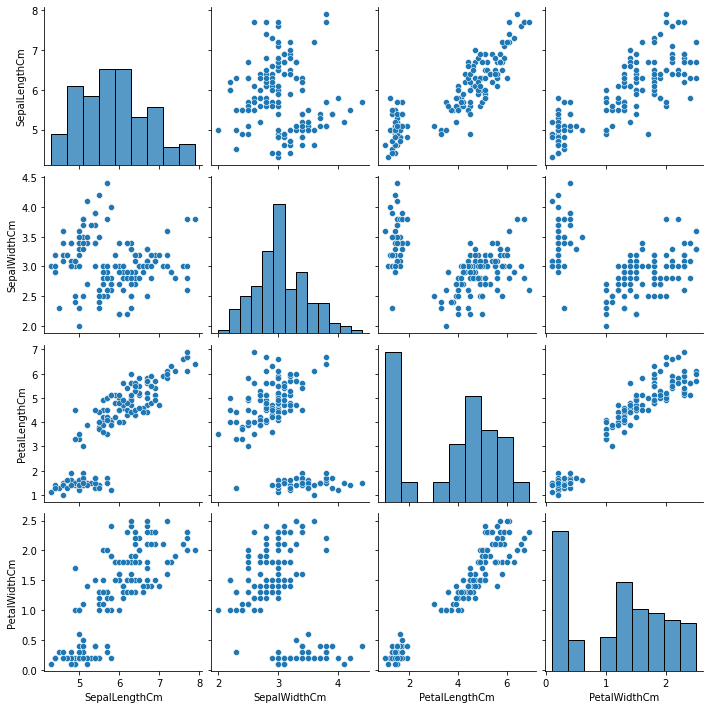

In [6]:
dataset = dataset.drop(['Id'],axis=1)
sns.pairplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



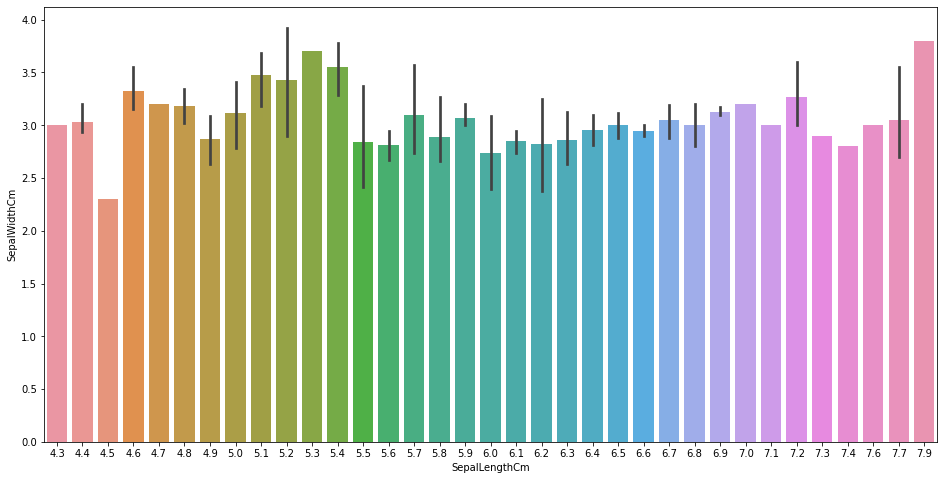

In [7]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.barplot('SepalLengthCm',y='SepalWidthCm',data=dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



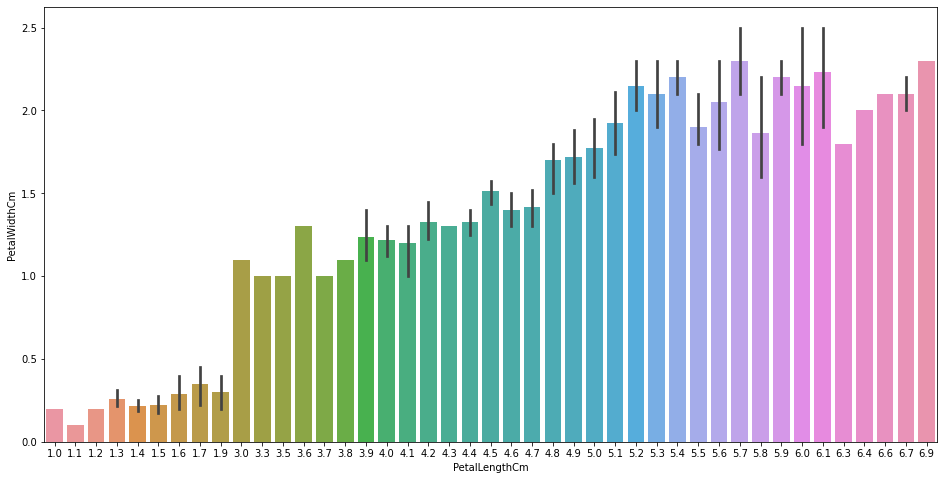

In [8]:
sns.barplot('PetalLengthCm',y='PetalWidthCm',data=dataset)
plt.show()

In [9]:
px.scatter(data_frame=dataset, x='SepalLengthCm',y='SepalWidthCm',  color='Species')

In [10]:
px.scatter(data_frame=dataset, x='PetalLengthCm',y='PetalWidthCm',  color='Species')

# **Correlation Matrix**

In [11]:
corr_matrix = dataset.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


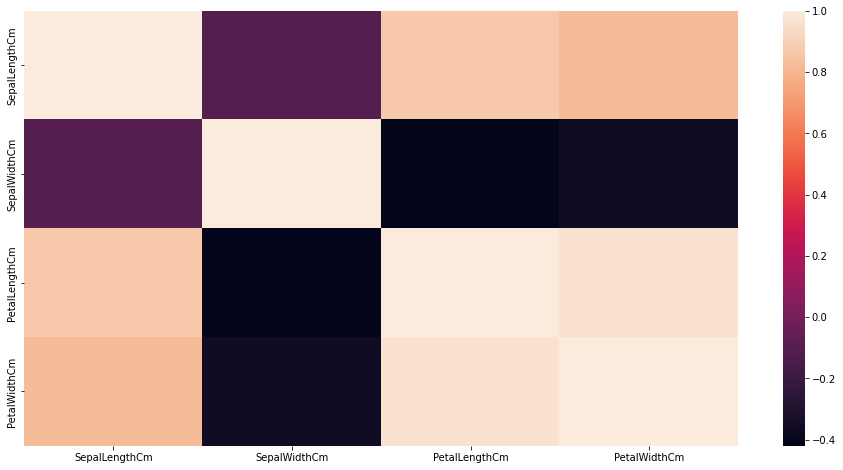

In [12]:
sns.heatmap(corr_matrix)

# **Splitting of Data and Training of Model**

In [13]:
y=dataset.iloc[:,4]
x=dataset.iloc[:,0:4]
y

80     Iris-versicolor
117     Iris-virginica
108     Iris-virginica
120     Iris-virginica
10         Iris-setosa
            ...       
134     Iris-virginica
99     Iris-versicolor
60     Iris-versicolor
39         Iris-setosa
64     Iris-versicolor
Name: Species, Length: 150, dtype: object

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# **Prediction using trained Model**

In [16]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9333333333333333

In [18]:
model.predict([[6.1,2.5,3.0,2.7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['Iris-virginica'], dtype=object)

# **Visualization of the DecisionTree Model**

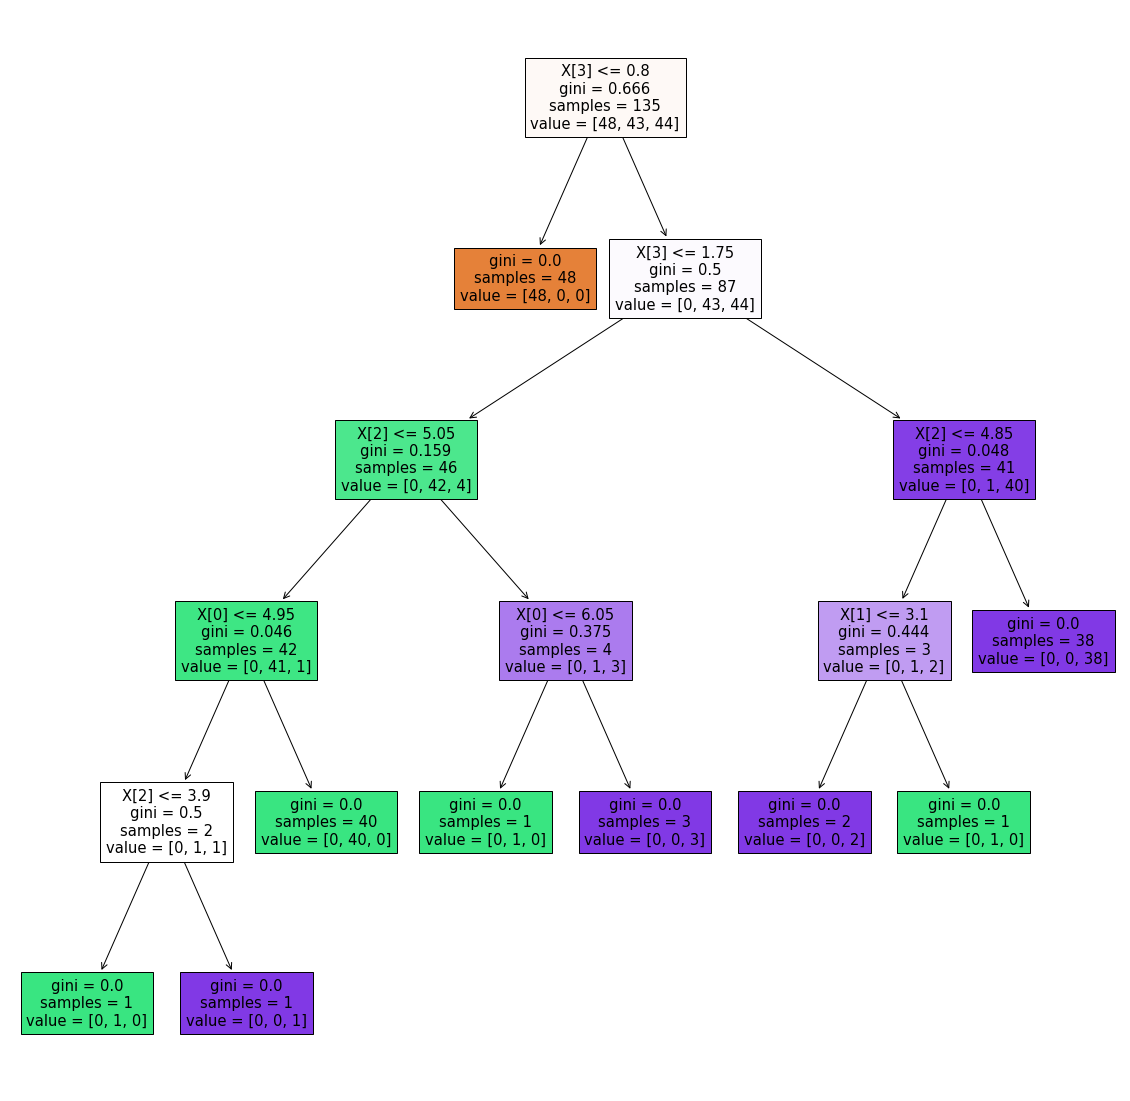

In [19]:
plt.figure(figsize=(20,20))
tree.plot_tree(DecisionTreeClassifier().fit(x_train,y_train),filled=True)
plt.show()